In [12]:

import collections
from datetime import datetime
from IPython.display import clear_output, display, HTML
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from pathlib import Path
import pickle
import scipy
# import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
import sys
from numpy.fft import fft, rfft
from scipy.signal import spectrogram
from wfOpto import *
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings("ignore")

plt.style.use(r'C:\Users\nadia\OneDrive\Documents\GitHub\steinmetzlab\calcium imaging\ALpres.mplstyle')

print('done')

done


In [1]:
print('bro')

bro


### importing

In [11]:
dataVis=wfOpto((Path(r'Z:\Subjects\AL_0023\2023-08-24\1')))
#this is a test comment 

KeyboardInterrupt: 

In [ ]:
dataOp = wfOpto(Path(r'Z:\Subjects\ZYE_0069\2023-08-16\1'))

In [ ]:
data830 = wfOpto((Path(r'Z:\Subjects\AL_0023\2023-08-30\1')), listExps=[np.r_[:1350], np.r_[1350:1800]])

In [ ]:
# process 830
power = 3
pixel = (410, 428)
n_samples = 650
timestamps = np.linspace(-0.3, 1, n_samples)*1000

pixel_ix = np.ravel_multi_index((428, 410), (dataVis.py, dataVis.px))
pows = np.argwhere(dataVis.laserPowers[dataVis.listExps[0]] == power).ravel()
onTimes = dataVis.laserOn[dataVis.listExps[0]][pows]
trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
trs = np.squeeze(np.array(trs))

flicker = []
for iT, tr in enumerate(trs):
    wf = dataVis.tToWFManual(tr)
    dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
    dwf = np.array(dwf)
    mov = dataVis.svdSpat[pixel_ix] @ dwf
    flicker.append(mov)
flicker = np.array(flicker)

NameError: name 'dataVis' is not defined

### figure 1

- the technique works via viral injection of opsin + gcamp.
- we can track brain activity against stimulus using WF and it corresponds with ephys results. 
- we can make pretty images of the brain that correspond to the pixel values we use in analysis.

#### panels

In [ ]:
def brainImg(ax):
    '''
    '''
    pows = np.argwhere(data.laserPowers==1.5).ravel()
    galvoY = np.argwhere(data.galvoY==2.5).ravel()
    theseTrs=np.intersect1d(pows,galvoY)
    data.fullAvg(start=-.3,stop=1,step=650,trials=theseTrs)
    plt.xticks([])
    plt.yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)


In [ ]:
def inactivation(ax):
    plt.text(x=.3, y=.3, s='Basic power-inactivation',transform=ax.transAxes)
    plt.xticks([])
    plt.yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)


In [ ]:
def microscope(ax):
    '''
    shows pulse length and magnitude
    pulse length - .1 s
    magnitude is 2.5 
    '''
    plt.text(x=.3, y=.3, s='microscope Img',transform=ax.transAxes)
    plt.xticks([])
    plt.yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
def geneExpression(ax):
    '''
    shows pulse length and magnitude
    pulse length - .1 s
    magnitude is 2.5 
    '''
    plt.text(x=.3, y=.3, s='Gene Expression',transform=ax.transAxes)
    plt.xticks([])
    plt.yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)


In [ ]:
def wfTrace(ax):
    power = 2.5
    n_samples=650
    timestamps=np.linspace(-.3,1,n_samples)*1000
    galvoLoc=2.5

    pixel_ix=np.ravel_multi_index((428,410),(data.py, data.px))
    pows = np.argwhere(data.laserPowers==power).ravel()
    galvoY = np.argwhere(data.galvoY==galvoLoc).ravel()
    theseTrs=np.intersect1d(pows,galvoY)
    onTimes=data.laserOn[theseTrs]
    trs=[np.linspace(-.3+on,1+on,n_samples) for on in onTimes]
    trs=np.squeeze(np.array(trs))

    thisPower=[]
    for iT, tr in enumerate(trs):
        wf=data.tToWf(tr)
        dwf=[np.diff(i,prepend=i[0]) for i in wf.T]
        dwf=np.array(dwf)
        mov=data.svdSpat[pixel_ix]@dwf
        thisPower.append(mov)
    thisPower=np.array(thisPower)
    plt.plot(timestamps,np.mean(thisPower,axis=0))
    plt.axvspan(0,100,color='gray',alpha=.3,lw=0)
    plt.title(f'power={power} yLoc={galvoLoc} xLoc={0} One Pixel')
    plt.xlabel('time (ms)')
    plt.ylabel('$\Delta F$')

In [ ]:
def ephys(ax):
    # Time array from -300 ms to 1000 ms
    t = np.linspace(-0.3, 1, 650)  # Time from -300 ms to 1000 ms in seconds

    # Frequency of the sine wave (adjust as needed)
    frequency = 1  # 1 Hz

    # Amplitude of the sine wave (adjust as needed)
    amplitude = 1

    # Phase shift of the sine wave (adjust as needed)
    phase_shift = 0

    # Calculate the sine wave
    sine_wave = amplitude * np.sin(2 * np.pi * frequency * t + phase_shift)

    # Plot the sine wave
    plt.plot(t, sine_wave)
    plt.xlabel('Time (s)')
    plt.ylabel('activity')
    plt.title('Ephys activity for 1.5mW bottom left')
    plt.show()

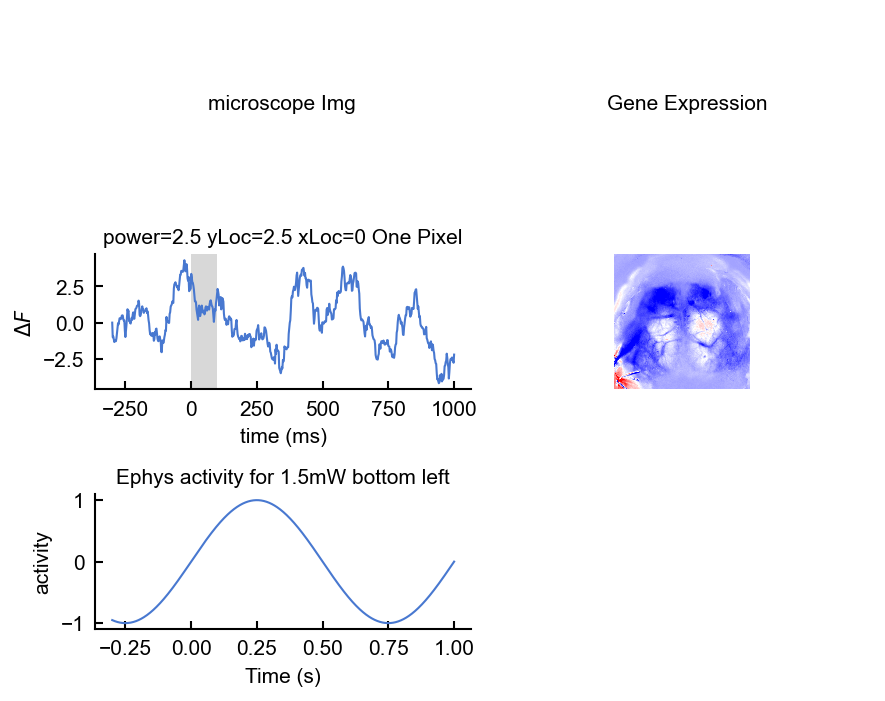

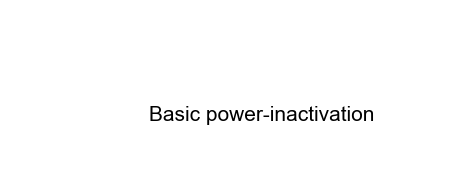

In [ ]:
# figure plotting

f = plt.figure(figsize=(6,6))
gs=mpl.gridspec.GridSpec(4,2)


ax = plt.subplot(gs[0])
microscope(ax)

ax = plt.subplot(gs[1])
geneExpression(ax)

ax = plt.subplot(gs[3])
brainImg(ax)

ax = plt.subplot(gs[2])
wfTrace(ax)

ax = plt.subplot(gs[4])
ephys(ax)

ax = plt.subplot(gs[5])
inactivation(ax)

### figure 2

- In control mice (no opsin) red laser at certain powers and locations evokes response in visual cortex. 
- The magnitude of the visual response is reduced by adapting the retina with flicker. 
- There exists a range of laser powers that inactive neurons while not evoking a detectable visual response. 
- Light intensities used for fluorescence imaging do not drive opsin. 


In [ ]:
def controlBrain(ax):
    '''
    img of the brain of the brain of the control mouse. shows where stimulation happens (retina and VC)
    '''
    dataVis.fullAvg(start=0,stop=.5,step=100)

In [ ]:
def activityStim(ax):
    '''
    in a control mouse - activity in the VC when stimulating retina and when stimulating VC
    using power 2
    '''
    power = np.squeeze(np.argwhere(dataVis.laserPowers==3))
    locTop = np.squeeze(np.argwhere(dataVis.galvoY==0))
    locBot = np.squeeze(np.argwhere(dataVis.galvoY==2.5))
    n_samples=650
    
    #stim retina
    indexRetina = np.intersect1d(power,locTop)
    pixel_ixRetina = np.ravel_multi_index((450,150),(dataVis.px,dataVis.py))
    onTimes = dataVis.laserOn[indexRetina]
    trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
    trs = np.squeeze(np.array(trs))
    responseRet=[]
    for iT, tr in enumerate(trs):
        wf = dataVis.tToWFManual(tr)
        dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
        dwf = np.array(dwf)
        mov = dataVis.svdSpat[pixel_ixRetina] @ dwf
        responseRet.append(mov)
    responseRet = np.array(responseRet)
    
    #stim VC
    indexVC = np.intersect1d(power,locBot)
    pixel_ixVC = np.ravel_multi_index((450,150),(dataVis.py,dataVis.px))
    onTimes = dataVis.laserOn[indexVC]
    trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
    trs = np.squeeze(np.array(trs))
    responseVC=[]
    for iT, tr in enumerate(trs):
        wf = dataVis.tToWFManual(tr)
        dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
        dwf = np.array(dwf)
        mov = dataVis.svdSpat[pixel_ixVC] @ dwf
        responseVC.append(mov)
    responseVC = np.array(responseVC)

    plt.plot(timestamps, np.mean(responseRet, axis=0),label='Stim Retina',color='orange')
    plt.plot(timestamps, np.mean(responseVC, axis=0), label='Stim VC', color='green')
    plt.legend(fontsize=7)
    plt.xlabel('time (ms)',fontsize=7)
    plt.ylabel('$\Delta F$',fontsize=7)
    plt.title('(Control Mouse) Visual Response',fontsize=10)

In [ ]:
def powActivity(ax):
    powers = np.unique(dataVis.laserPowers)
    pxPowersRetina=[]
    pxPowersVC=[]
    n_samples=650

    pixel_ix= np.ravel_multi_index((450,150),(dataVis.px,dataVis.py))

    trsRetina = np.argwhere(dataVis.galvoY==0).ravel()
    trsVC = np.argwhere(dataVis.galvoY==2.5).ravel()

    for iP, power in enumerate(powers):
        if power >= 0:
            trsPower = np.argwhere(dataVis.laserPowers==power).ravel()
            
            #retina
            onTimesRetina = np.intersect1d(trsRetina,trsPower)
            theseTrsRet = [np.linspace(on+-.3,on+1,n_samples) for on in onTimesRetina]
            theseTrsRet = np.squeeze(np.array(theseTrsRet))
            thisPowerRetina=[]
            for iT, tr in enumerate(theseTrsRet):
                wf=dataVis.tToWFManual(tr)
                dwf=[np.diff(i,prepend=i[0]) for i in wf.T]
                dwf = np.array(dwf)
                mov = dataVis.svdSpat[pixel_ix] @ dwf
                thisPowerRetina.append(mov)
            thisPowerRetina = np.array(thisPowerRetina)
            pxPowersRetina.append(thisPowerRetina)

            #VC
            onTimesVC = np.intersect1d(trsVC, trsPower)
            theseTrsVC = [np.linspace(on+-.3,on+1,n_samples) for on in onTimesVC]
            theseTrsVC = np.squeeze(np.array(theseTrsVC))
            thisPowerVC=[]
            for iT, tr in enumerate(theseTrsVC):
                wf=dataVis.tToWFManual(tr)
                dwf=[np.diff(i,prepend=i[0]) for i in wf.T]
                dwf = np.array(dwf)
                mov = dataVis.svdSpat[pixel_ix] @ dwf
                thisPowerVC.append(mov)
            thisPowerVC = np.array(thisPowerVC)
            pxPowersVC.append(thisPowerVC)
    retinaInt=[]
    time=np.linspace(-.3,1,650)
    for count,pxPowers in enumerate(pxPowersRetina):
        pxPowers = np.mean(pxPowers,axis=0)
        min=np.min(pxPowers)
        pxPowers=pxPowers+(min*-1)
        int=np.trapz(y=pxPowers)
        retinaInt.append(int)
    retinaInt = np.array(retinaInt)

    vcInt=[]
    for count,pxPowers in enumerate(pxPowersVC):
        pxPowers = np.mean(pxPowers,axis=0)
        min=np.min(pxPowers)
        pxPowers=pxPowers+(min*-1)
        int=np.trapz(y=pxPowers)
        vcInt.append(int)
    vcInt = np.array(vcInt)

    dotkwargs={'marker':'.', 'yerr':0}
    constant=100

    plt.errorbar(np.unique(dataVis.laserPowers),retinaInt/constant,c='green',label='stim retina',**dotkwargs)
    plt.errorbar(np.unique(dataVis.laserPowers),vcInt/constant,c='orange',label='stim VC')
    plt.legend(fontsize=7)
    plt.xlabel('Optogenetic Laser Power mW',fontsize=7)
    plt.ylabel('Visual Response',fontsize=7)     
    plt.title('Magnitude of Visual Response',fontsize=10)            
    

In [ ]:
def visResp(ax):
    pixel = (410, 428)
    n_samples = 650
    timestamps = np.linspace(-0.3, 1, n_samples)*1000
    
    pixel_ix = np.ravel_multi_index((428, 410), (data830.py, data830.px))
    pows = np.argwhere(data830.laserPowers[data830.listExps[1]] == power).ravel()
    onTimes = data830.laserOn[data830.listExps[1]][pows]
    trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
    trs = np.squeeze(np.array(trs))
    
    noFlicker = []
    for iT, tr in enumerate(trs):
        wf = data830.tToWFManual(tr)
        dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
        dwf = np.array(dwf)
        mov = data830.svdSpat[pixel_ix] @ dwf
        noFlicker.append(mov)
    noFlicker = np.array(noFlicker)
    # plt.plot(timestamps, np.mean(noFlicker, axis=0))
    # plt.title(f'power {power}')
    # plt.xlabel('time (ms)')
    # plt.ylabel('$\Delta F$')
    colors = ['forestgreen', 'darkorange']
    plt.plot(timestamps, np.mean(noFlicker, axis=0), color=colors[0], label='without flicker')
    plt.fill_between(timestamps, \
                     np.mean(noFlicker, axis=0)-scipy.stats.sem(noFlicker,axis=0),\
                     np.mean(noFlicker,axis=0)+scipy.stats.sem(noFlicker,axis=0), color=colors[0], alpha=0.3, lw=0, label='_nolegend_')
    
    plt.plot(timestamps, np.mean(flicker,axis=0),color=colors[1], label='with flicker')
    plt.fill_between(timestamps, \
                     np.mean(flicker, axis=0)-scipy.stats.sem(flicker,axis=0),\
                     np.mean(flicker,axis=0)+scipy.stats.sem(flicker,axis=0), color=colors[1], lw=0, label='_nolegend_', alpha=0.3)
    plt.axvspan(0,100,color='gray',alpha=.3,lw=0)
    plt.legend(fontsize=7)
    plt.ylim(None, 30)
    plt.xticks([0, 500, 1000], [0, 0.5, 1])
    plt.xlabel('Time from stim onset(s)',fontsize=7)
    plt.ylabel('Visual response',fontsize=7)
    plt.title(f'{power} mW opto stim',fontsize=10)

In [ ]:
def adaptResp(ax):
    powers = np.unique(data830.laserPowers)
    pixel = (410, 428)
    pxPowersFlicker = [] 
    pxPowersNoFlicker = []
    n_samples = 650
    
    pixel_ix = np.ravel_multi_index((428, 410), (data830.py, data830.px))
    for iP, power in enumerate(powers):
        if power >= 0:
            theseTrsFlicker = np.argwhere(data830.laserPowers[data830.listExps[0]]== power).ravel()
            # theseTrsFlicker=theseTrsFlicker[::3]
            onTimesFlicker = data830.laserOn[data830.listExps[0]][theseTrsFlicker]
            trsFlicker = [np.linspace(on+0, .25+on, n_samples) for on in onTimesFlicker]
            trsFlicker = np.squeeze(np.array(trsFlicker))
            
            theseTrsNFlicker = np.argwhere(data830.laserPowers[data830.listExps[1]]== power).ravel()
            onTimesNFlicker = data830.laserOn[data830.listExps[1]][theseTrsNFlicker]
            trsNFlicker = [np.linspace(0+on, .25+on, n_samples) for on in onTimesNFlicker]
            trsNFlicker = np.squeeze(np.array(trsNFlicker))
            
            thisPowerNFlicker = []
            thisPowerFlicker = []
            for iT, tr in enumerate(trsFlicker):
                wf = data830.tToWFManual(tr)
                dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
                dwf = np.array(dwf)
                mov = data830.svdSpat[pixel_ix] @ dwf
                thisPowerFlicker.append(mov)
            thisPowerFlicker = np.array(thisPowerFlicker)
            pxPowersFlicker.append(thisPowerFlicker)
    
            for iT, tr in enumerate(trsNFlicker):
                wf = data830.tToWFManual(tr)
                dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
                dwf = np.array(dwf)
                mov = data830.svdSpat[pixel_ix] @ dwf
                thisPowerNFlicker.append(mov)
            thisPowerNFlicker = np.array(thisPowerNFlicker)
            pxPowersNoFlicker.append(thisPowerNFlicker)   
    
    flickInt = []
    time=np.linspace(0,0.25,650)
    for count,pxPowers in enumerate(pxPowersFlicker):
        pxPowers = np.mean(pxPowers, axis=0)
        min = np.min(pxPowers)
        pxPowers = pxPowers+ (min*-1)
        int = np.trapz(y=pxPowers)
        flickInt.append(int)
    flickInt = np.array(flickInt)
    
    noflickInt = []
    time=np.linspace(0,0.25,650)
    for count,pxPowers in enumerate(pxPowersNoFlicker):
        pxPowers = np.mean(pxPowers, axis=0)
        min = np.min(pxPowers)
        pxPowers = pxPowers+ (min*-1)
        int = np.trapz(y=pxPowers)
        noflickInt.append(int)
    noflickInt = np.array(noflickInt)
    # plt.plot(np.unique(data830.laserPowers),noflickInt,c='red')

    dotkwargs = {'marker': '.', 'yerr': 0}
    constant = 100
    plt.errorbar(np.unique(data830.laserPowers), noflickInt/constant, c='forestgreen', label='without flicker', **dotkwargs)
    
    # plt.plot(np.unique(data830.laserPowers),flickInt,c='blue')
    plt.errorbar(np.unique(data830.laserPowers), flickInt/constant, c='darkorange', label='with flicker', **dotkwargs)
    
    plt.legend(fontsize=7)
    plt.xlabel('Optogenetic laser power (mW)',fontsize=7)
    plt.ylabel('Visual response',fontsize=7)
    plt.title('Magnitude of Visual Response',fontsize=10)

In [ ]:
# figure plotting

f = plt.figure(figsize=(4,15))
gs=mpl.gridspec.GridSpec(10,2)

# ax = plt.subplot(gs[0])
# controlBrain(ax)

ax = plt.subplot(gs[2])
activityStim(ax)

ax = plt.subplot(gs[4])
powActivity(ax)

ax = plt.subplot(gs[6])
visResp(ax)

ax = plt.subplot(gs[7])
adaptResp(ax)

ax = plt.subplot(8)
opsinLight(ax)

f.tight_layout()

NameError: name 'plt' is not defined

### figure 3

- there is temporal spread
- there is spatial spread
- spread and activation depends on power 
- it is consistent over months 

tbd:
- with flicker
- day-to-day

NameError: name 'temporalRes' is not defined

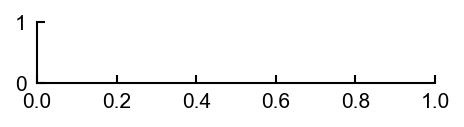

In [ ]:
# figure plotting

f = plt.figure(figsize=(6,6))
gs=mpl.gridspec.GridSpec(8,2)

# ax = plt.subplot(gs[0])
# temporalRes(ax)

# ax = plt.subplot(gs[1])
# temportalQuant(ax)

# ax = plt.subplot(gs[2])
# spatRes(ax)

# ax = plt.subplot(gs[3])
# spatQuant(ax)

# ax = plt.subplot(gs[4])
# powerDep(ax)

# ax = plt.subplot(gs[6])
# activityPast(ax)

# ax = plt.subplot(gs[7])
# activityPresent(ax)

### figure 4

- activity in the left doesnt predict the right and vice versa

In [ ]:
f = plt.figure(figsize=(6,6))
gs=mpl.gridspec.GridSpec(2,2)

# ax = plt.subplot(gs[0])
# imgLeft(ax)

# ax = plt.subplot(gs[1])
# quantLeft(ax)

# ax = plt.subplot(gs[2])
# imgRight(ax)

# ax = plt.subplot(gs[3])
# quantRight(ax)